<a href="https://colab.research.google.com/github/map72ru/biz_learn/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание
Практическое задание:
- взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- сделать обзорный анализ выбранного датасета
- сделать feature engineering
- обучить любой классификатор (какой вам нравится)
- разобраться с SHAP и построить важности признаков для:
- всего тестового набора данных (summary_plot - дать интерпретацию)
- для топ 10%
- для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

Возьмем датасет https://archive.ics.uci.edu/ml/datasets/adult (прошлого ДЗ6) оценка годового дохода.


In [4]:
from google.colab import drive
drive.mount('/content/hw2')

Drive already mounted at /content/hw2; to attempt to forcibly remount, call drive.mount("/content/hw2", force_remount=True).


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("hw2/MyDrive/data/adult.data", header=None, names=['age','workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation', 'relationship', 'race', 'sex',
                                                                      'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'adult'])
print(df.shape)
df.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,adult
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  adult           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Состав датасета:
*   age - возраст
*   workclass - класс работающего
*   fnlwgt - вес, присвоенный Бюро переписи населения
*   education - образование
*   education-num - код образования
*   marital-status - семейное положение
*   occupation - род занятий
*   relationship - отношения в семье
*   race - раса
*   sex - пол
*   capital-gain - прирост капитала
* 	capital-loss - потеря капитала
*   hours-per-week - работает часов в неделю	
*   native-country - страна рождения
*  	adult - доход (Б=50К, >50К)


In [4]:
for attr in df.columns:
  if df[attr].dtype == 'object':
    print(attr,': ',df[attr].unique())

workclass :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship :  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race :  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex :  [' Male' ' Female']
native-country :  [' United-States' ' Cub

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c28d5a310>,
      dtype=object)

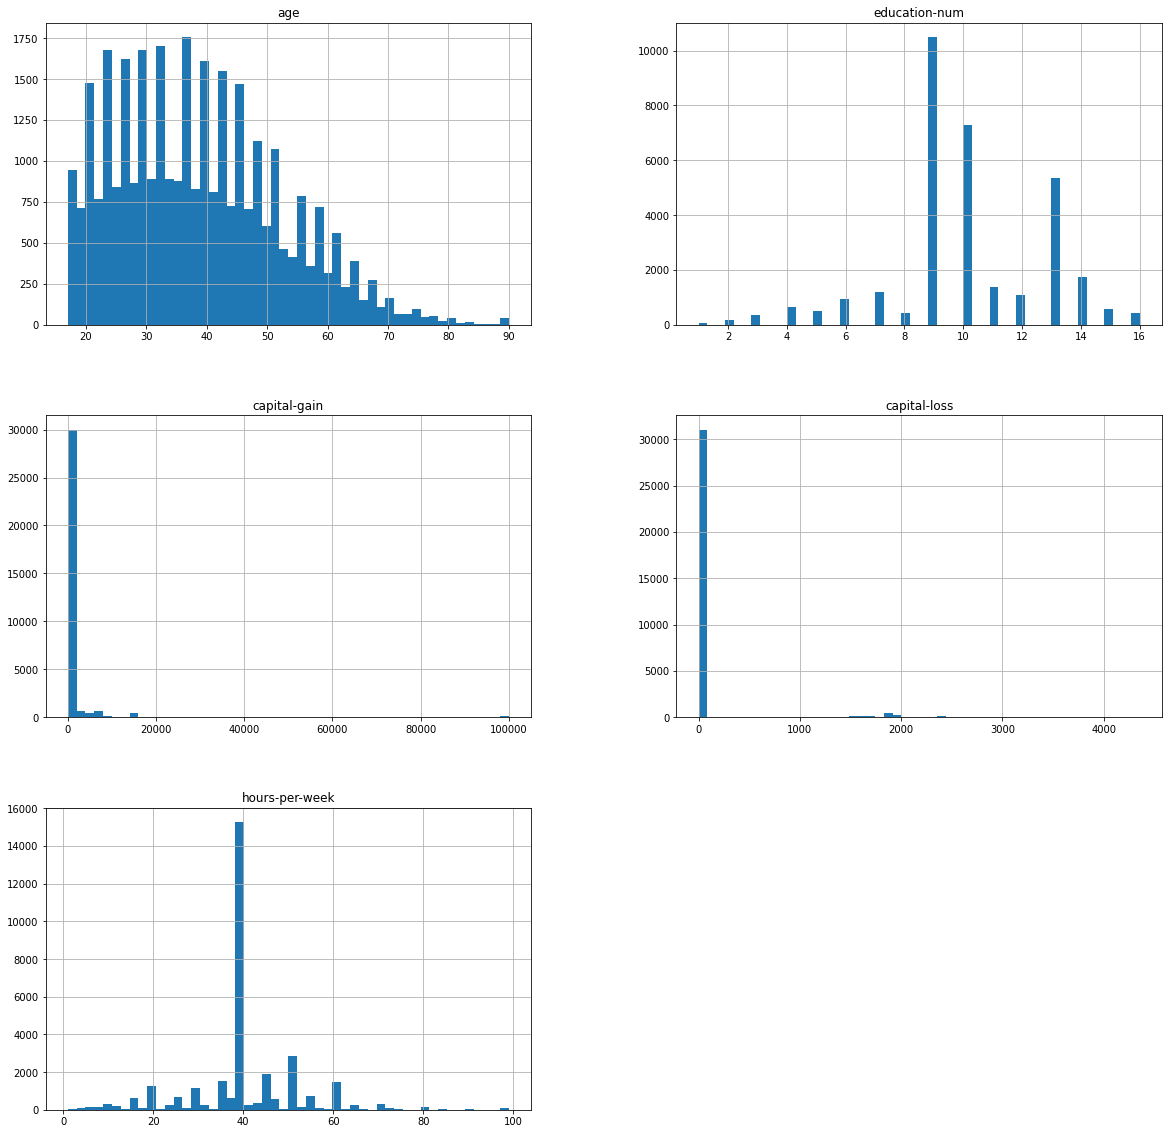

In [6]:
num_names = ['age', 'education-num', 'capital-gain','capital-loss','hours-per-week']
df[num_names].hist(figsize=(20,20), bins=50, grid=True)

In [7]:
data = df.drop('education', axis=1)
data['target'] = data.adult.map({' <=50K': 0, ' >50K': 1})
data = data.drop('adult', axis=1)
data['sex'] = data.sex.map({' Male': 1, ' Female': 0})
data['race'] = data.race.map({' White': 1, ' Black': 0, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4})
data['workclass'] = data.workclass.factorize()[0]
data['marital-status'] = data['marital-status'].factorize()[0]
data['relationship'] = data.relationship.factorize()[0]
data['native-country'] = data['native-country'].factorize()[0]
data['occupation'] = data['occupation'].factorize()[0]

In [8]:
from sklearn.model_selection import train_test_split
y = data['target']
X = data.drop('target', axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
catClassif = RandomForestClassifier(max_depth=5, random_state=42)
catClassif.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [10]:
y_pred = catClassif.predict(X_test)

In [11]:
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, \
confusion_matrix, recall_score

r =  roc_auc_score(y_test, y_pred)

print('roc_auc:', r, 'Accuracy:', accuracy_score(y_test, y_pred),
                    'Precision:', precision_score(y_test, y_pred), "Recall:", recall_score(y_test, y_pred),
                    'matrix:', confusion_matrix(y_test, y_pred))

roc_auc: 0.713975540107386 Accuracy: 0.8500184252548827 Precision: 0.8361904761904762 Recall: 0.455630513751946 matrix: [[6042  172]
 [1049  878]]


In [12]:
!pip install shap

In [13]:
import shap

explainer = shap.TreeExplainer(catClassif)
shap_values = explainer.shap_values(X_train, y_train)


In [29]:
shap_values[0][:500]

array([[-2.94162538e-02,  6.50550265e-04, -8.13901648e-05, ...,
         4.42460955e-03,  1.10655292e-02, -3.70574171e-04],
       [ 5.54599103e-02,  5.37260934e-04, -3.49744709e-04, ...,
         4.09313568e-03, -3.16218046e-02, -4.35695885e-04],
       [-2.89109823e-02,  5.19850807e-04, -1.16301059e-04, ...,
         4.56496848e-03, -3.48099839e-02, -3.70320695e-04],
       ...,
       [-2.96857662e-02,  2.28914703e-03,  1.00137739e-04, ...,
         5.39589929e-03, -3.60572024e-02,  3.87150679e-04],
       [-6.48565038e-03,  9.01858822e-04, -1.45232919e-04, ...,
         2.68322201e-03, -2.87005968e-02, -2.28215071e-04],
       [ 4.10048451e-02,  5.08479856e-04, -2.57134999e-05, ...,
         2.17551450e-03,  1.18676963e-02, -1.22450164e-04]])

In [23]:
X_train[0:500]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29,49,2,193366,9,1,6,1,1,1,0,0,40,0
12181,27,2,134152,9,1,9,1,1,1,0,0,45,0
18114,44,2,169980,7,1,4,1,0,1,0,0,60,0
4278,59,2,656036,13,4,0,4,1,1,0,0,60,0
12050,54,2,188136,13,2,5,0,1,0,0,1408,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14736,49,2,153536,10,2,3,0,1,1,14084,0,44,0
28089,27,2,278122,9,0,7,3,1,1,0,0,40,0
21393,37,1,187411,13,1,7,1,1,1,0,0,50,4
322,35,2,186110,9,2,7,0,1,1,0,0,45,0


In [16]:
explainer.expected_value

array([0.75783292, 0.24216708])

In [35]:
import shap
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][:1000], X_train[0:1000])

График показывает силу значения признака в определденной точке измерений. Красным на целевое значение 1, синим - на ноль.

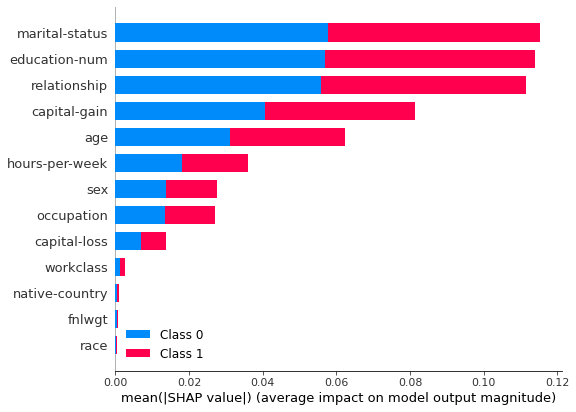

In [36]:
shap.summary_plot(shap_values, X_train)

Если я понимаю правильно, то все основные признаки оказывают примерно одинаковое влияние на целевые значения.